In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"

from checkpoint_grid_search import *

/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_30/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# <h1><center><ins>GRID SEARCH y RANDOM SEARCH</ins></center></h1>
<h1><center>Práctica guiada:</center></h1>
<img src="img/01_gs.jpg" alt="Drawing" style="width: 400px;"/>

<a id="tabla_contenidos"></a> 
## Tabla de Contenidos

### <a href='#section_objetivos'>0. Objetivos de la Notebook</a>


### <a href='#section_repaso'>1. Introducción</a>
- #### <a href='#section_hiperparametros'>1.1 ¿Qué son los hiperparámetros de un modelo?</a>
- #### <a href='#section_gs_rs'>1.2 GridSearch y RandomSearch: estrategias para definir hiperparámetros</a>
- #### <a href='#1.3'>1.3 Repaso hiperparámetros modelos</a>
- #### <a href='#1.4'>1.4 Receta general</a>

### <a href='#2.'>2. Manos a la obra: busquemos hiperparámetros</a>
- #### <a href='#2.1'>2.1 Cargar y preparar dataset</a>
- #### <a href='#2.2'>2.2 Probamos hiperparámetros "a mano"</a>
- #### <a href='#2.3'>2.3 Usando GridSearchCV</a>
- #### <a href='#2.4'>2.4 Usando RandomizedSearchCV</a>

### <a href='#3.'>3. Comentarios finales</a>

<a id="section_objetivos"></a> 
## 0. Objetivos de la Notebook

<div id="caja11" style="float:left;width: 100%;">
  <div style="float:left;width: 9%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;">
      <label>Conocer un método para determinar hiper-parámetros: </label>
      <a class="reference internal" href=https://scikit-learn.org/stable/modules/grid_search.html><b><code>GridSearch</code>         </b></a>
  <div style="float:left;width: 85%;">
      <label>Comparar dos aproximaciones para la búsqueda de hiperparámetros óptimos para un modelo:</label>    
      <a class="reference internal" href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html><b><code>GridSearch</code></b></a><label> y </label><a class="reference internal" href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html><b><code>RandomSearch</code>
      </b></a>
   <br>
   <div style="float:left;width: 85%;">
      <label>Implementar <code>GridSearch</code> y <code>RandomSearch</code> de <b>sklearn</b> para autoajustar un modelo.</label>
</div>    
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="section_repaso"></a> 
## 1. Introducción

<a id="section_hiperparametros"></a> 
### 1.1 ¿Qué son los hiperparámetros de un modelo?

Los **hiperparámetros** son aquella/s característica/s externas de un modelo que no se "aprenden" de forma directa a partir del entrenamiento con los datos. 

Son **valores** que tiene que definirse cuando se implementa el modelo, antes de realizar el entrenamiento.

Un ejemplo de **hiperparámetro** es el valor **k** en el algoritmo [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

Por otro lado, un **parámetro** de un modelo es una característica o propiedad interna cuyo valor es estimado a partir del entrenamiento con los datos. Un ejemplo de estos, son los **coeficientes** de una **regresión lineal** o **logística**.


Los **hiperparámetros** son muy importantes a la hora de entrenar un modelo ya que van a impactar en su desempeño y no se puede saber **a priori** cuáles son los mejores **hiperparámetros** para elegir en función del problema con el que estamos lidiando. 
Además, mientras que para un modelo una **configuración específica de hiperparámetros** puede presentar un excelente desempeño en determinado problema, en otro contexto ese mismo modelo con la misma configuración de hiperparámetros puede ser que no represente la solución de mejor rendimiento. Así que contar con estrategias para definir los **hiperparámetros** de un modelo es de suma importancia en machine-learning:

<img src="img/02_gs.png" alt="Drawing" style="width: 400px;"/>

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>HINT para no olvidar:</b> recuerden que los <b>hiperparámetros</b> con las características del modelo que vamos a poder tunear a través de <code>GridSearch</code> y <code>RandomSearch</code>, por ejemplo, y que son elegidas a priori por nosotros. Mientras que los <b>parámetros de un modelo</b>, es lo que el modelo aprende durante el entrenamiento (como por ejemplo los coeficientes beta de una regresión lineal)</label></div>
</div>


<img src="img/02_hiper.png" alt="Drawing" style="width: 500px;"/>

<a id="section_gs_rs"></a> 
### 1.2 GridSearch y RandomSearch: estrategias para definir hiperparámetros

Existen dos grandes métodos o procesos (aunque no son los únicos) que nos permiten buscar cuáles son los mejores **hiperparámetros** en nuestro problema (**hyper-parameter tunning**): [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [`RandomSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html):



[`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) se basa en buscar la mejor combinación de **hiperparámetros** dentro de una **grilla (grid)** especificada previamente. Lo que caracteriza esta estrategia es que la búsqueda es **exhaustiva para cada valor de la grilla** y se elige la combinación de **hiperparámetros** que minimizan una determinada métrica de error, como puede ser el **accuracy** en un problema de clasificación o el **coeficiente de determinación** (R2) en uno de regresión. Esta estrategia se denomina **grid** porque su idea es hacer un **retículo** con todos los **hiperparámetros** definidos en la grilla y sus resultados en el modelo.

[`RandomSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) dado que el **GridSearch** implica una búsqueda exhaustiva de todas las combinaciones posibles de la grilla de **hiperparámetros** especificada, su ejecución pude volverse computacionalmente muy intensa (en particular si estamos haciendo una búsqueda por una gran cantidad de **hiperparámetros**). Con la estrategia de **RandomSearch** se realiza la búsqueda de la mejor combinación de **hiperparámetros** pero a partir de seleccionar en forma **aleatoria** un **subset** de los **hiperparámetros**, lo que achia el espacio de búsqueda.

<img src="img/03_gs_bis.png" alt="Drawing" style="width: 800px;"/>

Si tomamos como ejemplo lo que plantea esta figura, podemos distinguir claramente las diferencias entre ambas estrategias. Mientras que en [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) se van a evaluar todas las combinaciones de las opciones de cada uno de los dos **hiperparámetros** (dado que en la grilla de cada uno de ellos se definen tres valores, entonces vamos a tener un total de 9 opciones para evaluar); en [`RandomSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) se van a evaluar un **sub-set de combinaciones** de esa misma grilla seleccionadas en forma **aleatoria** (así, por ejemplo, en este caso quedan 6 opciones para ser evaluadas). 

**¿Cómo hacen estas estrategias para hacer la búsqueda de hiperparámetros?**:
Ambas estrategias, para determinar cuál es la combinación óptima de **hiperparámetros**, se basan en entrenar y validar el modelo seleccionado con cada una de estas posibles combinaciones a partir de estrategias de **cross-validation**: 

<img src="img/04_gs.png" alt="Drawing" style="width: 800px;"/>

En el esquema anterior, se observa que:
- primero se va a separar la data para quedarnos con un subconjunto de datos (**test**) para evaluar el poder de **generalización** de nuestro modelo (**holdout sets**).
- Luego, los datos de **train** van a ser utilizados para seleccionar la mejor combinación de **hiperparámetros** a partir de una estrategia de **cross-validation** con 5-folds. Es decir que cada **combinación de hiperparámetros** de toda la grilla (en el caso de **GridSearch**) o del subset elegido aleatoriamente de la misma (en el caso de **RandomSearch**), va a ser validado mediante este esquema de **cross-validation**. 
- Además, estas estrategias nos van a permitir elegir cuál es la **métrica de evaluación** que queremos utilizar como objetivo. Si en un problema de clasificación tenemos un dataset balanceado, podemos utilizar el **accuracy**; o si el dataset llega a tener un problema de desbalanceo de clases, podemos utilizar el **recall** para que la estrategia de búsqueda priorice la combinación de **hiperparámetros** que menos errores cometa identificando a los **True positive**. 
- Por último, la **mejor combinación de hiperparámetros** la vamos a volver a entrenar con todo nuestro conjunto de datos de **train** y vamos a evaluar su poder de generalización con los datos de **test** que nos guardamos en el primer paso (**holdout sets**). 



Teniendo en cuenta el esquema de **cross-validation** que se va a aplicar tanto para **GridSearch** como para **RandomSearch**, ¿qué problema podríamos tener si usamos un modelo con **muchos hiperparámetros** y, a su vez, para cada **hiperparámetro** queremos evaluar un rango muy extenso de posibles valores: 
<img src="img/05_gs.jpg" alt="Drawing" style="width: 400px;"/>

Y sí, vamos a tener un **"bad time"** porque computacionalmente puede tornarse muy costoso a nivel de cómputo estar haciendo la evalaución de todas las combinaciones posibles de los valores de los **hiperparámetros**. Por esa razón, en algunos casos vamos a tener que elegir una **grilla reducida** de **hiperparámetros**, o utilizar **RandomSearch** que al elegir un subset de combinaciones va a generar un costo de cómputo mucho menor y nos va a brindar resultados con mayor rapidez. 

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [2]:
#Ejecutá esta celda...
test_1()


La estrategia de GridSearch:



RadioButtons(layout=Layout(width='100%'), options=('Hace una búsqueda exhaustiva de los parámetros del modelo.…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

<a id="1.3"></a>
### 1.3 Repaso hiperparámetros modelos

<img src="img/06_hyp.jpg" alt="Drawing" style="width: 300px;"/>

**Regresión lineal**:
- En Scikit la decisión sobre si el modelo tiene o no intercepto. 
- Documentación:[`Regresión lineal`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
***

**Regresiones Ridge, Lasso y Elastic Net:**
- El principal es **alpha** (a veces llamado lambda) que regula cuánto se penaliza el valor de los coeficientes. A mayor **alpha** (lambda) se produce un mayor sesgo y menor varianza.
- Documentación:[`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html),[`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), [`Elastic Net`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)  
***

**K Nearest Neighbors (KNN):**
- Los dos principales son: 
    - k: la cantidad de vecinos. A mayor K, mayor sesgo y menor varianza.
    - weight: si queremos ponderar más a algunos vecinos que a otros de los contemplados por el valor K.
- Documentación:[`KNN`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
***

**Regresión logística:**
- El principal es **C** que es la inversa de la fuerza de regularización. Mientras más pequeño sea el valor, más fuerte va a ser la regularización (CUIDADO: por default viene en 1, lo que implica que va a regularizar; si queremos reducir la regularización tenemos que reemplazarlo por un número muy grande). A mayor C, menor sesgo y mayor varianza. 
- Documentación:[`Regresión logística`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
***

**Naive Bayes:**
- Tiene hiperparámetros pero que no suelen ajustarse. 
***

<a id="1.4"></a>
### 1.4 Receta general

A la hora de implementar en `sklearn` una búsqueda sobre **hiperparámetros** tenemos que tener en cuenta las siguientes cuestiones:
- Elegir un **estimador**, es decir, un modelo sobre el cual queremos trabajar.
- Elegir un **espacio de parámetros** donde vamos a hacer la búsqueda.
- Elegir un **método de busqueda** sobre los modelos candidatos (`RandomSearch`,`GridSearch`).
- Implementar un **esquema de validación cruzada**, donde se deben elegir la cantidad de particiones.
- La **métrica de evaluación** para elegir el mejor modelo... y ¡gualá!

<img src="img/06_receta.jpg" alt="Drawing" style="width: 300px;"/>


<a href='#tabla_contenidos'>Volver a TOC</a>

***

<a id="2."></a> 
## 2. Manos a la obra: busquemos hiperparámetros

<a id="2.1"></a>
### 2.1 Cargar y preparar el dataset

Vamos a aplicar **GridSearch** y **RandomSearch** sobre un set de datos adaptados de una competencia de kaggle ya cerrada: https://www.kaggle.com/kevinmh/fifa-18-more-complete-player-dataset

En el dataset vamos a encontrar todos los jugadores de fútbol argentino que están en el juego fifa-18, y contaremos con las siguientes variables: 
- **ID**: un número único que identifica al jugador en toda la base.
- **full_name**: nombre completo del jugador.
- **age**
- **club**: del jugador
- **height_cm**
- **weight_kg**
- **puntaje_global**: puntaje que identifica la habilidad general del jugador, vamos a contar con tres categorías de nivel: bajo, medio y alto.
- **potencia**: potencia física del jugador.
- **ritmo**: velocidad de aceleración del jugador.
- **disparos**: nivel de precisión y potencia de sus remates.
- **pases**: nivel de precisión en sus pases.
- **amagues**: nivel de habilidad para amagar a un rival.
- **defensa**: capacidad defensiva general del jugador.
- **físico**: estado físico del jugador (nos indicaría qué tan rápido se cansa)

El **objetivo** del dataset es utilizar distintas features vinculadas al jugador para poder predecir qué nivel global tiene. 

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [3]:
# Ejecutá esta celda..
test_2()


Estamos planteando un problema de machine-learning de qué tipo?:



RadioButtons(layout=Layout(width='100%'), options=('Clasificación', 'Regresión', 'Reducción de la dimensionali…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

Veremos cómo usar `GridSearchCV` para tunear el hiperparámetro `k` del algoritmo de vecinos más cercanos.

Para empezar, importamos las librerías que hemos visto en módulos pasados y cargamos el dataset

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../Data/fifa_18_jugadores_argentinos.csv',index_col='Unnamed: 0')
df.head()

,ID,full_name,club,age,league,height_cm,weight_kg,puntaje_global,potencia,ritmo,disparos,pases,amagues,defensa,físico
1,158023,Lionel Messi,FC Barcelona,30,Spanish Primera División,170.0,72.0,alto,93,89,90,86,96,26,61
9,167664,Gonzalo Higuaín,Juventus,29,Italian Serie A,184.0,87.0,alto,90,79,87,70,83,25,74
16,153079,Sergio Agüero,Manchester City,29,English Premier League,173.0,70.0,alto,89,87,88,75,89,23,72
19,211110,Paulo Dybala,Juventus,23,Italian Serie A,177.0,73.0,alto,93,86,85,81,91,24,67
85,183898,Ángel Di María,Paris Saint-Germain,29,French Ligue 1,180.0,75.0,alto,85,86,77,82,86,47,68


Corroboramos que no haya valores faltantes en nuestro dataset y verificamos el tipo de dato de cada columna

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 1 to 17912
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              962 non-null    int64  
 1   full_name       962 non-null    object 
 2   club            962 non-null    object 
 3   age             962 non-null    int64  
 4   league          962 non-null    object 
 5   height_cm       962 non-null    float64
 6   weight_kg       962 non-null    float64
 7   puntaje_global  962 non-null    object 
 8   potencia        962 non-null    int64  
 9   ritmo           962 non-null    int64  
 10  disparos        962 non-null    int64  
 11  pases           962 non-null    int64  
 12  amagues         962 non-null    int64  
 13  defensa         962 non-null    int64  
 14  físico          962 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 120.2+ KB


Armamos la matriz de predictores ($X$) (vamos a seleccionar sólo las columnas numéricas) y el target ($y$) (que es el nivel de puntaje total)

In [7]:
cols=['age','height_cm','weight_kg','potencia','ritmo','disparos','pases','amagues','defensa','físico']
X = df[cols]
y = df['puntaje_global']

Nos fijamos la distribución de las etiquetas para evaluar si hay un desbalanceo en las clases:

In [8]:
y.value_counts(normalize=True)

medio    0.376299
alto     0.347193
bajo     0.276507
Name: puntaje_global, dtype: float64

- La distribución es relativamente pareja entre las tres clases

Hacemos el split entre train y test (y por las dudas usamos el argumento de **stratify** para mantener la proporción de los niveles en los datos de train y test):

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=56)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(769, 10)

(193, 10)

(769,)

(193,)

¿Hace falta estandarizar en este caso? Los features están en las mismas unidades pero las escalas podrían ser distintas

In [10]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>HINT para no olvidar:</b> recuerden que siempre que estamos aplicando transformaciones sobre nuestros datos que dependen de estos (como la normalización), las transformaciones se entrenan con los datos de <b>train</b> sin incluir los de <b>test</b>, y sobre estos últimos se aplica la transformación ya entrenada. Por eso usamos <code>scaler.fit_transform(X_train)</code> para <b>train</b> pero sólo el método <code>scaler.transform(X_test)</code> para <b>test</b></label></div>
</div>

<a id="2.2"></a>
### 2.2 Probamos hiperparámetros "a mano"
Está claro que, dependiendo del modelo, los hiperparámetros pueden tener un efecto importante en la calidad de la predicción. 
Veamos cómo varía el accuracy a la hora de predecir el nivel del futbolista para **distintos valores de K**.

Para esto vamos a usar [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que nos permite evaluar los resultados de una métrica (el accuracy en este caso) en un esquema de validación cruzada. 

Vamosa utilizar 10 folds en `cross_val_score` pero para definir este número vamos a usar [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) una clase de **sklearn** que nos asegura que cada fold va contar con casos seleccionados en forma aleatoria pero que van a mantener la distribución original de las etiquetas.

In [11]:
# n_splits = permite determinar la cantidad de folds
# random_state = nos permite definir una semilla para asegura reproducibilidad
# shuffle = nos asegura que las particiones se van a hacer en forma aleatoria
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

# Hacemos un for para recorrer distintos valores de K y evaluamos los scores de la validación cruzada de los datos de train.
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=folds, scoring='accuracy')
    k_scores.append(scores.mean())
k_scores

[0.7697368421052632,
 0.7568010936431989,
 0.8232228298017772,
 0.816660970608339,
 0.824436090225564,
 0.8465311004784688,
 0.8322112098427887,
 0.8399521531100479,
 0.8399863294600136,
 0.8412679425837319,
 0.8438824333561176,
 0.8464969241285031,
 0.8426179084073822,
 0.850393028024607,
 0.85041011619959,
 0.8504101161995898,
 0.8426349965823651,
 0.8517429938482571,
 0.8400205058099794,
 0.8504613807245386,
 0.8504784688995215,
 0.8543403964456596,
 0.846514012303486,
 0.855622009569378,
 0.8452323991797677,
 0.8529904306220095,
 0.8361244019138756,
 0.8387218045112782,
 0.8413362952836637,
 0.8361244019138756]

En la lista encontramos los valores de **accuracy** que obtuvimos en la validación cruzada para cada uno de los distintos valores de **k**.

Grafiquemos estos resultados para ver más claro cuál es el **k** óptimo según esta validación.

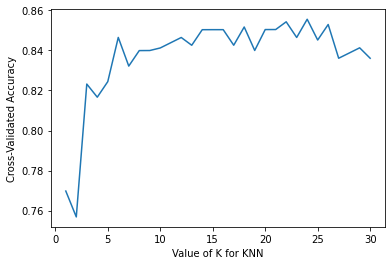

In [12]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

Como siempre, observamos que la performance cambia para distintos valores del hiperparámetro, siendo que el **k** óptimo es el de 23, con un score de validación de 0.855634.


¿Cómo podemos hacer para sistematizar esta búsqueda y sumar más hiperparámetros a la exploración? 

<a id="2.3"></a>
### 2.3 Usando [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Para ello vamos a importar el método [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) que básicamente va a implementar en forma automática lo que acabamos de hacer en forma manual.

**Documentación:** [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 

Es decir, nos va a permitir implementar una estrategia de validación cruzada en la cual va a realizar tantas validaciones como combinaciones posibles de hiperarámetros querramos evaluar (ya que recuerden que el `GridSearchCV` hace una búsqueda exhaustiva del espacio de hiperparámetros). 

Por ejemplo, de [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) podríamos querer explorar la combinación entre dos valores de vecinos (k: [2,5]) y las dos formas de considerar la influencia de los veciones entre sí (weights: [uniform, distance]). Ante este escenario, el [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) va aplicar una estrategia de validación por cada combinación de estos dos hiperparámetros: [2,uniform],[2,distance],[5,uniform], [5,distance]. Por cada una de estas combinaciones, `GridSearchCV` va aplicar una estrategia de validación cruzada (con la cantidad de folds que le indiquemos).

[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) va a necesitar 4 argumentos iniciales: 
- **estimator =**un estimador (es decir, modelo instanciado)
- **param_grid=** una grilla de parametros para recorrer (que tiene que ser un diccionario cuyas claves correspondan a los hiperparámetros del modelo y los valores sean listas de valores que va a recorrer `GridSearchCV`.
- **cv=** la cantidad de folds para la estrategia de validación cruzada
- **scoring=** cuál es la métrica que va a utiliza el método para evaluar cuál es la combinación de hiperparámetros más exitosa. 

Y uno opcional, pero que es muy recomendable ya que estas exploraciones exhaustivas pueden demorar mucho tiempo: 
- **n_jobs=** controla el número de procesadores que corren en paralelo.

Comencemos primero importando el método de sklearn

In [13]:
from sklearn.model_selection import GridSearchCV

Instanciamos el estimador/modelo

In [14]:
knn = KNeighborsClassifier()

Definimos la grilla de parámetros que queremos testear

In [15]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>HINT para no olvidar:</b> Recuerden que la grilla de parámetros tiene que ser un diccionario cuyas <b>claves</b> son el nombre de los hiperparámetros según está definido en la documentación, y los <b>valores</b> son la lista de valores que definimos de cada hiperparámetros y cuya combinación queremos explorar en nuestro modelo</code>. 
</div>

Definimos la cantidad de folds

In [16]:
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

Instanciamos el método `GridSearchCV` eligiendo **accuracy** como medida de scoring dado que los datos están **balanceados**, y el resto de argumentos que definimos arriba.

In [17]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')

Entrenamos utilizando el método `.fit` de grid

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

`GridSeachCV` devuelve un dict con mucha información. Desde el tiempo de fiteo de cada parámetro hasta los scores promedio (vía validación cruzada). También provee los score en cada train y test set de la K-Fold Cross Validation. 

In [19]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

En **cv_results_** podemos ver los detalles de cada uno de los hierparámetros o combinación de hiperparámeros que evaluó el `GridSeachCV`. Incluso podemos ver el score obtenido en cada split, el **mean_test_score** y el **std_test_score**.

Además, encontramos el **rank_test_score** que nos indica cuál fue el hiperparámetro o combinación de hiperparámetros que obtuvo el mejor score de validación.

In [20]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001564,0.000223,0.002488,0.000172,1,{'n_neighbors': 1},0.779221,0.818182,0.727273,0.792208,0.831169,0.753247,0.779221,0.714286,0.805195,0.697368,0.769737,0.042954,29
1,0.001461,0.000037,0.002459,0.000056,2,{'n_neighbors': 2},0.714286,0.805195,0.714286,0.740260,0.805195,0.740260,0.766234,0.766234,0.779221,0.736842,0.756801,0.031504,30
2,0.001434,0.000011,0.002480,0.000019,3,{'n_neighbors': 3},0.831169,0.805195,0.766234,0.818182,0.909091,0.818182,0.805195,0.792208,0.805195,0.881579,0.823223,0.040097,27
3,0.001431,0.000005,0.002499,0.000018,4,{'n_neighbors': 4},0.818182,0.870130,0.779221,0.792208,0.896104,0.818182,0.818182,0.753247,0.792208,0.828947,0.816661,0.039934,28
4,0.001458,0.000057,0.002579,0.000082,5,{'n_neighbors': 5},0.779221,0.870130,0.831169,0.818182,0.935065,0.857143,0.818182,0.727273,0.792208,0.815789,0.824436,0.053027,26
5,0.001549,0.000041,0.002724,0.000056,6,{'n_neighbors': 6},0.818182,0.909091,0.844156,0.805195,0.935065,0.883117,0.870130,0.766234,0.805195,0.828947,0.846531,0.049630,10
6,0.001539,0.000032,0.002748,0.000042,7,{'n_neighbors': 7},0.818182,0.883117,0.844156,0.818182,0.922078,0.844156,0.870130,0.727273,0.792208,0.802632,0.832211,0.051256,25
7,0.001546,0.000032,0.002750,0.000047,8,{'n_neighbors': 8},0.831169,0.896104,0.844156,0.818182,0.935065,0.844156,0.896104,0.766234,0.805195,0.763158,0.839952,0.053365,21
8,0.001539,0.000025,0.002788,0.000037,9,{'n_neighbors': 9},0.818182,0.909091,0.818182,0.818182,0.909091,0.844156,0.909091,0.792208,0.792208,0.789474,0.839986,0.047840,20
9,0.001557,0.000036,0.002811,0.000068,10,{'n_neighbors': 10},0.818182,0.909091,0.831169,0.831169,0.896104,0.870130,0.922078,0.779221,0.779221,0.776316,0.841268,0.052560,18


Podemos también acceder rápidamente a cuál fue el mejor modelo (ya que cuando tengamos muchos hiperparámetros no va a ser demasiado práctico ver la información de **cv_results_**)

In [21]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=24)

- Podemos ver todos los hiperparámetros del mejor modelo, donde se observa que el **número óptimo de vecinos** es 24

In [22]:
grid.best_score_

0.855622009569378

- **best_score_** nos indica cuál fue la performance promedio del score de validación del grid search

In [23]:
grid.best_params_

{'n_neighbors': 24}

- finalmente **best_params_** nos muestra cuáles fueron los hiperparámetros seleccionados luego de la búsqueda exhaustiva.

<img src="img/07_html.jpg" alt="Drawing" style="width: 300px;"/>

El anterior fue un caso sencillo de búsqueda de hiperparámetros porque sólo optimizamos un hiperparámetro. Así que ahora que sabemos **"HTML"** probemos ahora, con el mismo caso, pero agregando **más hiperparámetros para tunear**.

Vamos a agregar el **parámetro binario de Peso** del algoritmo **KNN** que determina si algunos vecinos tendrán mayor ponderación que otros a la hora de clasificar. El valor **distance** indica que el peso es inversamente proporcional a la distancia.

[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) exige que la **grilla de parámetros** a explorar venga en un diccionario con los **nombres de los parámetros** y la **lista de los posibles valores**. 

Noten que [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) tiene todos los métodos que la API de sklearn ofrece para modelos predictivos: fit, predict, predict_proba, etc. Es decir que una vez que tenemos el mejor modelo, podemos directamente usar el método predict de [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Algo que hace [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) es que una vez que elije el mejor o la mejor combinación de hiperparémetros, re-entrena el **estimador o modelo** utilizando esa combinación de hiperparámetros pero usando ahora **todos los datos de train**. Esto nos ahorra tener que entrenar nuevamente el modelo, y nos permite ir directamente a testearlo con los **datos de test**.

In [24]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

Entonces, ahora el tunning se realizará iterando y alternando `weights` y `k` (nro. de vecinos cercanos).

In [25]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [26]:
#Ejecutá esta celda...
test_3()


¿Cómo se realizará el proceso de búsqueda?:



RadioButtons(layout=Layout(width='100%'), options=('En forma exhaustiva', 'En forma aleatoria'), value='En for…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

Ajustamos nuevamente el modelo como hicimos antes

In [27]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Veamos los resultados

In [28]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001638,0.000304,0.002549,0.000232,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.779221,0.818182,0.727273,0.792208,0.831169,0.753247,0.779221,0.714286,0.805195,0.697368,0.769737,0.042954,57
1,0.001462,0.000029,0.001372,0.000053,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.779221,0.818182,0.727273,0.792208,0.831169,0.753247,0.779221,0.714286,0.805195,0.697368,0.769737,0.042954,57
2,0.001465,0.000039,0.002468,0.000030,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.714286,0.805195,0.714286,0.740260,0.805195,0.740260,0.766234,0.766234,0.779221,0.736842,0.756801,0.031504,60
3,0.001443,0.000018,0.001404,0.000024,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.779221,0.818182,0.727273,0.792208,0.831169,0.753247,0.779221,0.714286,0.805195,0.697368,0.769737,0.042954,57
4,0.001439,0.000015,0.002513,0.000062,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.831169,0.805195,0.766234,0.818182,0.909091,0.818182,0.805195,0.792208,0.805195,0.881579,0.823223,0.040097,54
5,0.001440,0.000016,0.001431,0.000032,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.831169,0.805195,0.753247,0.818182,0.909091,0.818182,0.805195,0.792208,0.805195,0.868421,0.820608,0.040368,55
6,0.001432,0.000007,0.002503,0.000013,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.818182,0.870130,0.779221,0.792208,0.896104,0.818182,0.818182,0.753247,0.792208,0.828947,0.816661,0.039934,56
7,0.001431,0.000008,0.001455,0.000030,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.818182,0.857143,0.766234,0.805195,0.909091,0.831169,0.857143,0.766234,0.818182,0.842105,0.827068,0.041009,52
8,0.001473,0.000059,0.002610,0.000099,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.779221,0.870130,0.831169,0.818182,0.935065,0.857143,0.818182,0.727273,0.792208,0.815789,0.824436,0.053027,53
9,0.001442,0.000007,0.001484,0.000016,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.792208,0.883117,0.818182,0.818182,0.935065,0.857143,0.844156,0.727273,0.805195,0.828947,0.830947,0.052598,51


(¡Fijense que ahora la grilla de resulados es mucho más larga!)

¿Cuál habrá sido el **mejor modelo**?

In [29]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(n_neighbors=24, weights='distance')
0.8582194121667805
{'n_neighbors': 24, 'weights': 'distance'}


- En esta nueva búsqueda de **hiperparámetros**, los mejores resultados los obtuvimos con k=25 y con **distance**. Si vemos el resultado obtenido en la primer búsqueda (0.8556566970091027), en esta obtuvimos un resultado apenas por arriba = 0.8582574772431729

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>HINT para no olvidar:</b> Si estuviésemos enfrentando un problema de clases desbalanceadas, o nos interesaría ajustar los hiperparámetros en función de otra métrica de evaluación, recuerden que pueden hacerlo cambiando el parámetro scoring de <code>GridSearchCV</code> por otras medidas como <b>recall</b>, <b>f1</b> o <b>precision.</b></label></div>
</div>

**Llego el momento de la verdad...**
<img src="img/08_la_verdad.jpg" alt="Drawing" style="width: 300px;"/>

Usamos los mejores **hiperparámetros** para estimar las predicciones sobre los **datos de test** y evaluar cómo generaliza nuestro modelo ante datos con los que no fue entrenado y que no fueron usados para la **búsqueda de hiperparámetros**.

Para ello, podemos usar el atajo que tiene `GridSeachCV`: usando el método `predict` sobre objeto `grid` (que ya está entrenado con todos los **datos de train** y con la mejor combinación de hiperparámetros. 

In [30]:
y_pred_grid = grid.predict(X_test)

Podemos importar de **sklearn**, [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) que nos va a brindar un reporte completo de las principales **métricas de evaluación** 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print (classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

        alto       0.88      0.87      0.88        61
        bajo       0.93      0.91      0.92        55
       medio       0.84      0.86      0.85        77

    accuracy                           0.88       193
   macro avg       0.88      0.88      0.88       193
weighted avg       0.88      0.88      0.88       193



Varias cosas sobre este reporte: 
- Tenemos los resulados de varias mérricas de evaluación que ya son viejas conocidas nuestras como **precision**, **recall**, **f1-score** y **accuracy**
- El **accuracy** general (que se refiere a nuestra capacidad de identificar bien los **TP** y **TN** de cada clase es 0.88, se encuentra en la fila que dice **accuracy** y (aunque parezca contra-intuitivo) debajo de **f1-score**.
- Después, para cada nivel tenemos **precision**, **recall** y **f1-score**. Esto nos indica qué tan bien pudimos identificar cada una de estas etiquetas. Si nos detenemos en el **f1-score** vemos que la etiqueta **bajo** es aquella que pudimos identificar con mayor sensibilidad y precisión. 
- Por otro lado, la columna **support** tiene el número de casos positivos por cada etiqueta de los datos de test (61 para alto, 55 para bajo y 77 para medio). Y 193 es la cantidad total sumada de casos positivos de las tres etiquetas.
- Pero, **¿qué significa `macro avg` y `weighted avg`?**:
    - `macro avg` es la media de cada métrica de evaluación de las tres etiquetas. Si tuviésemos que reportar la **presicion** promedio de nuestros resultados, sería 0.89 que es el promedio entre la **precision** que obtuvimos para cada clase (0.90, 0.93, 0.84). Lo que hay que tener en cuenta es que siempre es recomendable ver cómo nos fue con cada clase y no confiar demasiado en los valores medios (en particular si por nuestro problema de negocios nos interesa más una clase que otra, o si estás lidiando con clases desbalanceadas).
    - `weighted avg` es lo mismo que el anterior, pero se calcula la media ponderada por **support**, es decir, teniendo en cuenta la cantidad de casos de cada clase. Este promedio toma en cuenta el potencial **desbalanceo de clases** y puede ser muy útil ante esos escenarios. Fijense que, en este caso, dado que las clases no están desbalanceadas en forma grosera, ambas medidas son casi idénticas. 

Veamos ahora cómo se ve la **matriz de confusión**:     

In [33]:
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

[[53  0  8]
 [ 0 50  5]
 [ 7  4 66]]


- Fijense que como en la matriz de confusión no definimos ningún orden, la primera fila corresponde a los casos reales de la etiqueta **alto**, la segunda a **bajo** y la tercera a **medio**. Y en el caso de las columnas de las predicciones ocurre lo mismo: la primera columna corresponde a las predicciones de **alto**, la segunda a **bajo** y la tercera a **medio**.
- Podemos ver claramente que la etiqueta **medio** es la que más confunde el modelo; esto tiene mucho sentido ya que los extremos son fáciles de separar más no así los casos que están en el medio. 

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>    
  <div style="float:left;width: 85%;"><label><b>¿Cómo le fue finalmente a nuestro modelo para identificar los jugadores según su nivel de performance? ¿Qué te parecen los resultados que obtuvimos?</b></label></div>
</div>

<a id="2.4"></a>
### 2.4 Usando [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Probemos ahora usar [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Recuerden que la diferencia es que con este método no vamos a explorar **todo el espacio** de **hiperparámetros** sino que se van a explorar combinaciones al azar. Aunque esta estrategia no cubre todo el espacio, puede tener sus ventajas cuando trabajamos con datasets muy pesados o cuando tenemos espacios de hiperparámetros muy grandes (como nos va a pasar con los modelos más avanzados que veamos al final de curso).

In [34]:
from sklearn.model_selection import RandomizedSearchCV

Los parámetros de [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) son los mismos que los de `GridSearchCV` pero se agrega `n_iter` que nos va a indicar qué número de combinaciones de hiperparámetros queremos seleccionar al azar de la grilla que definimos. Por default está seteado en **10** así que podríamos aumentarlo para incrementar nuestras chances de encontrar combinaciones óptimas. 

Armamos nuevamente nuestra **grilla de hiperparámetros**.

In [35]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


Ahora el tunning se realizará con combinaciones aleatorias de `weights` y `k` (nro. de vecinos cercanos).

In [36]:
random = RandomizedSearchCV(knn, param_grid, n_iter=20, cv=folds, scoring='accuracy',random_state=10)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=10, scoring='accuracy')

Los mismos métodos que teníamos con `GridSearchCV` los tenemos acá: 

In [37]:
pd.DataFrame(random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001923,0.000254,0.002194,0.000334,distance,16,"{'weights': 'distance', 'n_neighbors': 16}",0.818182,0.909091,0.844156,0.883117,0.896104,0.870130,0.883117,0.740260,0.831169,0.828947,0.850427,0.047012,5
1,0.001491,0.000049,0.001462,0.000110,distance,2,"{'weights': 'distance', 'n_neighbors': 2}",0.779221,0.818182,0.727273,0.792208,0.831169,0.753247,0.779221,0.714286,0.805195,0.697368,0.769737,0.042954,19
2,0.001482,0.000054,0.002910,0.000150,uniform,20,"{'weights': 'uniform', 'n_neighbors': 20}",0.805195,0.922078,0.857143,0.883117,0.870130,0.831169,0.896104,0.766234,0.818182,0.855263,0.850461,0.043921,3
3,0.001513,0.000086,0.001746,0.000150,distance,14,"{'weights': 'distance', 'n_neighbors': 14}",0.805195,0.909091,0.831169,0.857143,0.935065,0.883117,0.922078,0.740260,0.805195,0.815789,0.850410,0.058866,6
4,0.001495,0.000064,0.001685,0.000138,distance,11,"{'weights': 'distance', 'n_neighbors': 11}",0.818182,0.922078,0.818182,0.844156,0.883117,0.870130,0.909091,0.766234,0.805195,0.802632,0.843900,0.048108,14
5,0.001465,0.000044,0.001582,0.000036,distance,9,"{'weights': 'distance', 'n_neighbors': 9}",0.818182,0.922078,0.818182,0.818182,0.909091,0.844156,0.922078,0.779221,0.779221,0.802632,0.841302,0.053348,16
6,0.001447,0.000005,0.002825,0.000018,uniform,24,"{'weights': 'uniform', 'n_neighbors': 24}",0.818182,0.922078,0.844156,0.922078,0.883117,0.818182,0.896104,0.805195,0.818182,0.828947,0.855622,0.043381,2
7,0.001435,0.000010,0.002439,0.000012,uniform,2,"{'weights': 'uniform', 'n_neighbors': 2}",0.714286,0.805195,0.714286,0.740260,0.805195,0.740260,0.766234,0.766234,0.779221,0.736842,0.756801,0.031504,20
8,0.001440,0.000008,0.001619,0.000025,distance,12,"{'weights': 'distance', 'n_neighbors': 12}",0.818182,0.909091,0.844156,0.844156,0.935065,0.857143,0.896104,0.740260,0.766234,0.828947,0.843934,0.057550,13
9,0.001439,0.000007,0.002691,0.000016,uniform,14,"{'weights': 'uniform', 'n_neighbors': 14}",0.805195,0.922078,0.818182,0.870130,0.922078,0.870130,0.896104,0.779221,0.818182,0.802632,0.850393,0.049609,7


In [38]:
print (random.best_estimator_)
print(random.best_score_)
print(random.best_params_)

KNeighborsClassifier(n_neighbors=24, weights='distance')
0.8582194121667805
{'weights': 'distance', 'n_neighbors': 24}


Vemos que `RandomizedSearchCV` no obtuvo el mismo resultado que `GridSearchCV`, simplemente porque no probó tantas combinaciones y no encontró la óptima. Aunque fijense que el score de validación es muy similar al que obtuvimos antes, y acá ahorramos tiempo de cómputo.

Incluso podemos utilizar el método **predict** con el mejor modelo ya entrenado.

In [39]:
print (classification_report(y_test, random.predict(X_test)))

              precision    recall  f1-score   support

        alto       0.88      0.87      0.88        61
        bajo       0.93      0.91      0.92        55
       medio       0.84      0.86      0.85        77

    accuracy                           0.88       193
   macro avg       0.88      0.88      0.88       193
weighted avg       0.88      0.88      0.88       193



In [40]:
confusion = confusion_matrix(y_test, random.predict(X_test))
print(confusion)

[[53  0  8]
 [ 0 50  5]
 [ 7  4 66]]


¡Y con los **datos de test** obtuvimos **casi** los mismos resultados!

<a href='#tabla_contenidos'>Volver a TOC</a>

***

<a id="3."></a> 
## 3. Comentarios finales

<img src="img/23_conclusion.jpg" alt="Drawing" style="width: 400px;"/>

<div id="caja7" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/en_resumen.png" style="align:left"/> </div>
  <br>
  <br>  
  <div style="float:left;width: 85%;"><label><b>En conclusión...</b></label></div>
</div>
<br>

- Los **hiperparámetros** son aquella/s característica/s externas de un modelo que no se "aprenden" de forma directa a partir del entrenamiento con los datos, sino que tienen que definirse con anterioridad.


- Los **parámetros** de un modelo son características o propiedades internas cuyos valores son estimados a partir del entrenamiento con los datos.


- Los **hiperparámetros** son muy importantes a la hora de entrenar un modelo ya que van a impactar en su desempeño y no se puede saber **a priori** cuáles son los mejores


- Existen dos grandes métodos o procesos (aunque no son los únicos) que nos permiten buscar cuáles son los mejores **hiperparámetros** (**hyper-parameter tunning**): [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [`RandomSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


- [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) se caracteriza por hacer una búsqueda **exhaustiva para cada valor de la grilla de hiperparámetros** y elige la combinación de ellos que minimizan una determinada métrica de error.

- [`RandomizedSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) realiza la búsqueda de la mejor combinación de **hiperparámetros** pero a partir de seleccionar en forma **aleatoria** un **subset** de los **hiperparámetros**, lo que achica el espacio de búsqueda y reduce el tiempo de cómputo.


- La receta general para la búsqueda de **hiperparámetros** consta de: 
    - Elegir un **estimador (modelo)**
    - Elegir un **espacio de hiperparámetros**
    - Elegir un **método de búsqueda** (`RandomSearch`,`GridSearch`).
    - Definir un **esquema de validación cruzada**
    - Definir una **métrica de evaluación**


<a href='#tabla_contenidos'>Volver a TOC</a>